https://www.kaggle.com/datasets/mirichoi0218/insurance/data?select=insurance.csv

***A Linear regression model for Medical cost dataset. The dataset consists of age, sex, BMI (body mass index), children, smoker and region feature, which are independent and charge as a dependent feature.***

***I will predict individual medical costs billed by health insurance.***

***The prediction itself is based on my true data, except for my location in the United States***



***Columns***

***age:*** age of primary beneficiary

***sex:*** insurance contractor gender, female, male

***bmi:*** Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,
objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

***children:*** Number of children covered by health insurance / Number of dependents

***smoker:*** Smoking

***region:*** the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

***charges:*** Individual medical costs billed by health insurance

In [1]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import svm
from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, LabelEncoder


Mounted at /content/drive


In [2]:
path_file = '/content/drive/MyDrive/Colab Notebooks/Colab/Insurance/insurance.csv'
df_data = pd.read_csv(path_file)

df_data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
df_data.shape

(1338, 7)

In [4]:
df_data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [5]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
df_data.isna().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


In [7]:
df_data.duplicated().sum()

1

In [12]:
df_data = df_data.drop_duplicates()

In [13]:
df_data.describe()

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


In [14]:
df_data.shape

(1337, 7)

In [15]:
df_data


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [16]:
# df_data.replace({'sex': {'male': 0, 'female': 1},
#                  'smoker': {'yes': 0, 'no': 1},
#                  'region': {'southeast': 0, 'southwest': 1, 'northeast': 2, 'northwest': 3}},
#                 inplace=True)

<ipython-input-16-cd83370579f1>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_data.replace({'sex': {'male': 0, 'female': 1},


In [17]:
import pandas as pd

df_data.replace({'sex': {'male': 0, 'female': 1},
                 'smoker': {'yes': 0, 'no': 1}}, inplace=True)

df_data = pd.get_dummies(df_data, columns=['region'], drop_first=True)

print(df_data.head())


   age  sex     bmi  children  smoker      charges  region_1  region_2  \
0   19    1  27.900         0       0  16884.92400      True     False   
1   18    0  33.770         1       1   1725.55230     False     False   
2   28    0  33.000         3       1   4449.46200     False     False   
3   33    0  22.705         0       1  21984.47061     False     False   
4   32    0  28.880         0       1   3866.85520     False     False   

   region_3  
0     False  
1     False  
2     False  
3      True  
4      True  


Використання pd.get_dummies з параметром drop_first=True створює dummy variables для регіонів, уникаючи надмірної мультиколінеарності (тобто один із регіонів буде базовим, що трохи спрощує інтерпретацію).
Кожен регіон тепер представлений окремою колонкою (region_southwest, region_northeast, region_northwest), і модель не сприйматиме їх як числові значення.

In [18]:
df_data.head()

,age,sex,bmi,children,smoker,charges,region_1,region_2,region_3
0,19,1,27.900,0,0,16884.92400,True,False,False
1,18,0,33.770,1,1,1725.55230,False,False,False
2,28,0,33.000,3,1,4449.46200,False,False,False
3,33,0,22.705,0,1,21984.47061,False,False,True
4,32,0,28.880,0,1,3866.85520,False,False,True


In [19]:
corr_matrix = df_data.corr()
corr_matrix

,age,sex,bmi,children,smoker,charges,region_1,region_2,region_3
age,1.000000,0.019814,0.109344,0.041536,0.025587,0.298308,0.009415,0.001868,0.001495
sex,0.019814,1.000000,-0.046397,-0.017848,0.076596,-0.058044,0.003767,0.002008,0.012482
bmi,0.109344,-0.046397,1.000000,0.012755,-0.003746,0.198401,-0.006211,-0.138178,-0.136138
children,0.041536,-0.017848,0.012755,1.000000,-0.007331,0.067389,0.021538,-0.023202,0.026044
smoker,0.025587,0.076596,-0.003746,-0.007331,1.000000,-0.787234,0.037168,-0.002597,0.036321
charges,0.298308,-0.058044,0.198401,0.067389,-0.787234,1.000000,-0.043637,0.005945,-0.038695
region_1,0.009415,0.003767,-0.006211,0.021538,0.037168,-0.043637,1.000000,-0.320493,-0.320493
region_2,0.001868,0.002008,-0.138178,-0.023202,-0.002597,0.005945,-0.320493,1.000000,-0.319842
region_3,0.001495,0.012482,-0.136138,0.026044,0.036321,-0.038695,-0.320493,-0.319842,1.000000


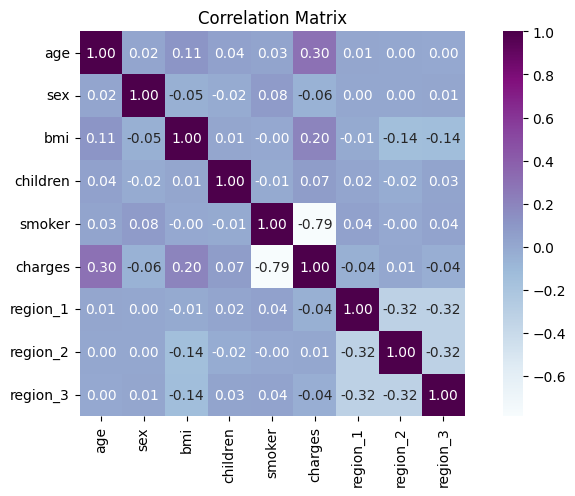

In [20]:
plt.figure(figsize=(10, 5))
plt.title("Correlation Matrix")
sns.heatmap(corr_matrix, annot=True, cmap='BuPu', fmt='.2f', square=True, cbar=True)
plt.show()

In [21]:
corr_charges = corr_matrix['charges'].sort_values(ascending=False)
corr_charges

,charges
charges,1.000000
age,0.298308
bmi,0.198401
children,0.067389
region_2,0.005945
region_3,-0.038695
region_1,-0.043637
sex,-0.058044
smoker,-0.787234


In [22]:
df_data

,age,sex,bmi,children,smoker,charges,region_1,region_2,region_3
0,19,1,27.900,0,0,16884.92400,True,False,False
1,18,0,33.770,1,1,1725.55230,False,False,False
2,28,0,33.000,3,1,4449.46200,False,False,False
3,33,0,22.705,0,1,21984.47061,False,False,True
4,32,0,28.880,0,1,3866.85520,False,False,True
...,...,...,...,...,...,...,...,...,...
1333,50,0,30.970,3,1,10600.54830,False,False,True
1334,18,1,31.920,0,1,2205.98080,False,True,False
1335,18,1,36.850,0,1,1629.83350,False,False,False
1336,21,1,25.800,0,1,2007.94500,True,False,False


In [24]:
X = df_data.drop('charges', axis=1).values
y = df_data['charges'].values

print(X.shape)
print(y.shape)


(1337, 8)
(1337,)


In [25]:
from sklearn.preprocessing import StandardScaler


In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lin_reg_model = LinearRegression()
lin_reg_model.fit(X_train, y_train)

LinearRegression()

In [27]:
y_train_pred = lin_reg_model.predict(X_train)
y_test_pred = lin_reg_model.predict(X_test)

print(f"Intercept: {lin_reg_model.intercept_:.4f}")
print(f"Coefficients: {lin_reg_model.coef_}")

train_mae = mean_absolute_error(y_train, y_train_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

test_mae = mean_absolute_error(y_test, y_test_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f"Training MAE: {train_mae:.4f}, MSE: {train_mse:.4f}, R²: {train_r2:.4f}")
print(f"Testing MAE: {test_mae:.4f}, MSE: {test_mse:.4f}, R²: {test_r2:.4f}")

Intercept: 11044.6506
Coefficients: [   248.21072022    101.54205399    318.70144095    533.0099888
 -23077.76459287    179.77986417    838.91961573    447.15816094]
Training MAE: 4181.9015, MSE: 36979860.9047, R²: 0.7299
Testing MAE: 4177.0456, MSE: 35478020.6752, R²: 0.8069


# ***1. Coefficients and intercept***.

***Intercept*** = 11044.6506 indicates the average basic cost of medical expenses when all predictors are equal to zero (which is not practical, but is a benchmark).

***Coefficients:***

The coefficients show the impact of each attribute on the outcome. For example, the coefficient for bmi = 318.70 indicates that a one-unit increase in body mass index can increase medical costs by about $318 (all else being equal).
Importantly, the coefficient for smoker is large and negative (approximately -23.077), indicating that smokers have significantly higher medical costs compared to non-smokers.

Translated with DeepL.com (free version)

# ***1. Коефіцієнти та інтерцепт***

***Intercept*** = 11044.6506 вказує на середню базову вартість медичних витрат за умов, коли всі предиктори дорівнюють нулю (що не має практичного сенсу, але є орієнтиром).

***Коефіцієнти:***

Коефіцієнти показують вплив кожної ознаки на кінцевий результат. Наприклад, коефіцієнт для bmi = 318.70 говорить, що зростання індексу маси тіла на одиницю може підвищити медичні витрати приблизно на 318 доларів (за інших рівних умов).
Важливо, що коефіцієнт для smoker є великим і від'ємним (приблизно -23,077), що вказує на те, що курці мають значно вищі медичні витрати в порівнянні з некурцями.

# ***2. MAE (Mean Absolute Error) and MSE (Mean Squared Error)***.

MAE on the training set = 4181.9015 and MAE on the test set = 4177.0456. These values show the average absolute difference between the predicted and actual values of insurance costs. For this type of problem, where insurance costs can vary greatly, an MAE of 4000-5000 is quite acceptable.

MSE on the training set = 36,979,860.9047  and MSE on the test set = 35,478,020.6752, An MSE value that is larger than the MAE is logical given the quadratic nature of MSE, which penalizes large deviations in predictions more.


# ***2. MAE (Mean Absolute Error) і MSE (Mean Squared Error)***

MAE на тренувальному наборі = 4181.9015  і MAE на тестовому наборі = 4177.0456. Ці значення показують середню абсолютну різницю між передбаченими і фактичними значеннями витрат на страхування. Для цього типу задачі, коли витрати на страхування можуть сильно варіюватися, MAE у 4000–5000 є цілком прийнятним.

MSE на навчальній вибірці = 36,979,860.9047 та MSE на тестовій вибірці = 35,478,020.6752, Значення MSE, яке є більшим за MAE, є логічним з огляду на квадратичну природу MSE, яка більше карає за великі відхилення в прогнозах.

# ***3. Coefficients and intercept***.

***Intercept*** = 11091.5999 indicates the average basic cost of medical expenses when all predictors are equal to zero (which is not practical, but is a benchmark).

***Coefficients:***

The coefficients show the impact of each attribute on the outcome. For example, the coefficient for bmi = 335.1 indicates that a one-unit increase in body mass index can increase medical costs by about $335 (all else being equal).
Importantly, the coefficient for smoker is large and negative (approximately -23.672), indicating that smokers have significantly higher medical costs compared to non-smokers.



# ***4. Coefficient of determination (R²)***

The value of 𝑅 2 for the test sample of 0.7299 means that about 72.99 % of the variation in charges is explained by the model, which is a good result for a linear regression.

This indicates that the model has a strong explanatory power, although it is not perfect. Typically, a value of 𝑅2  in the range of 0.7-0.8 is considered acceptable for linear regression.  If the R2 for the training set remains at around 0.81, this confirms that the model performs slightly better on the training set, but without significant overfitting. This means that the difference between the results on the training and test data is minimal and the model generalizes the data quite well.


# ***4. Коефіцієнт детермінації (R²)***
Значення
𝑅
2
R
2
  для тестової вибірки — 0.7299 — означає, що близько 72.99 % варіації в charges пояснюється моделлю, що є хорошим результатом для лінійної регресії. Це вказує на те, що модель має сильну пояснювальну здатність, хоч і не є досконалою. Зазвичай, для лінійної регресії значення
𝑅
2 в межах 0.7-0.8 вважається прийнятним.
𝑅
2

 Якщо R2 для тренувальної вибірки залишився приблизно на рівні 0.81, то це підтверджує, що модель дещо краще працює на тренувальній вибірці, але без суттєвої переобученості. Це означає, що різниця між результатами на тренувальних та тестових даних мінімальна і модель узагальнює дані досить добре.

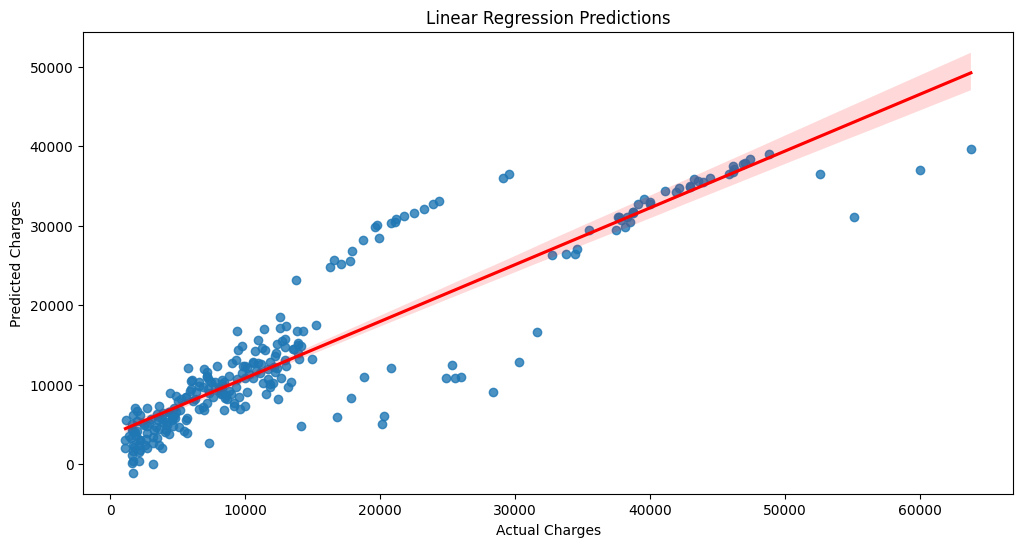

In [28]:
plt.figure(figsize=(12, 6))
sns.regplot(x=y_test, y=y_test_pred, line_kws={"color": "red"})
plt.title('Linear Regression Predictions')
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.show()

In [30]:
input_data = (35, 1, 18.5, 1, 1, 1, 0, 0)
input_data_reshaped = np.asarray(input_data).reshape(1,-1)
prediction = lin_reg_model.predict(input_data_reshaped)

print('The insurance cost in the USD is', prediction[0])

The insurance cost in the USD is 3364.56980678294


***Forecast for a specific customer:***

***input_data = (35, 1, 18.5, 1, 1, 1, 0, 0)***represents the demographic and other characteristics of an individual customer:
35 yrs,
female (sex = 1),
BMI = 18.5 (which falls within the range of a “healthy” body mass index),
1 child
no smoker (no smoker = 1),

 ***prediction = lin_reg_model.predict(input_data_reshaped) produces a result for this client, predicting that their annual health insurance costs will be approximately $3364.57.***

***Explanation of the prediction value***

The resulting value means that, based on the data, the health insurance costs for a client with the specified characteristics are likely to be $3364.57 per year. The model is based on the trends observed in the training data and reflects the relationship between the client's characteristics and their insurance costs.



***Model quality score lin_reg_model.score (X_test, y_test):***

This metric shows the coefficient of determination
R² for the test data, i.e., how much of the variation in health insurance costs (charges) is explained by variations in the variables age, sex, bmi, children, smoker, and region. If R²
  is close to 1, the model explains the data well; if it is significantly lower, the model needs to be improved.
Intercept and regression coefficients:
Intercept: lin_reg_model.intercept_ is the baseline value of medical expenses if all other variables are zero. The intercept value represents the average baseline cost of insurance for clients in this dataset.
Coefficients: lin_reg_model.coef_ is the effect of each variable (e.g., age, bmi, smoker, etc.) on health insurance costs. Each coefficient shows by how many units the insurance costs change when the corresponding variable increases by one unit (all other things being equal).
Error metrics for the training and test sets:
MAE (Mean Absolute Error): shows the average difference between the predicted and actual costs. The lower the MAE value, the more accurate the prediction.
MSE (Mean Squared Error): Sensitive to large errors. This value gives more weight to significant deviations in forecasts.


R² (Coefficient of determination): R² shows how well a model explains the variation in the target variable (in this case, charges). An R² value close to 1 means that the model fits the data well.
Forecast for a specific customer:
input_data = (35, 1, 18.5, 1, 1, 1, 0, 0) represents the demographic and other characteristics of an individual customer:
35 yrs,
female (sex = 1),
BMI = 18.5 (which falls within the range of a “healthy” body mass index),
1 child
no smoker (no smoker = 1),
region  (1, 0, 0)
prediction = lin_reg_model.predict(input_data_reshaped) produces a result for this client, predicting that their annual health insurance costs will be approximately $3364.57.

Explanation of the prediction value

The resulting value means that, based on the data, the health insurance costs for a client with the specified characteristics are likely to be $3,040.03 per year. The model is based on the trends observed in the training data and reflects the relationship between the client's characteristics and their insurance costs.

***Оцінка якості моделі***

***Інтерцепт та коефіцієнти регресії:***

***Intercept (Вільний член):*** lin_reg_model.intercept_ — це базове значення медичних витрат, якщо значення всіх інших змінних дорівнюють нулю. Значення інтерцепту відображає середню базову вартість страхування для клієнтів у цьому датасеті.

***Coefficients (Коефіцієнти для кожної ознаки): ***lin_reg_model.coef_ — це вплив кожної змінної (наприклад, age, bmi, smoker, тощо) на витрати на медичне страхування. Кожен коефіцієнт показує, на скільки одиниць змінюються витрати на страхування при збільшенні відповідної змінної на одиницю (за інших рівних умов).
Метрики помилки на тренувальному та тестовому наборах:

***MAE (Mean Absolute Error,*** Середня абсолютна помилка): показує середню різницю між передбаченими та фактичними витратами. Чим нижче значення MAE, тим точніше передбачення.
***MSE*** (Mean Squared Error, Середня квадратична помилка): чутливий до великих помилок. Це значення надає більше ваги значним відхиленням у прогнозах.
***R²***(Коефіцієнт детермінації): R² показує, наскільки добре модель пояснює варіацію в цільовій змінній (в цьому випадку, charges). Значення R², близьке до 1, означає, що модель добре підходить до даних.
Прогноз для конкретного клієнта:

input_data = (35, 1, 18.5, 1, 1, 0) представляє демографічні та інші характеристики окремого клієнта:
35 років,
жінка (sex = 1),
BMI = 18.5 (що потрапляє в межі "здорового" індексу маси тіла),
1 дитина
не палить (no smoker = 1),
prediction = lin_reg_model.predict(input_data_reshaped) дає результат для цього клієнта, передбачаючи, що його річні витрати на медичне страхування становитимуть приблизно 3364.57 USD.

Пояснення значення прогнозу
Отримане значення означає, що, виходячи з даних, витрати на медичне страхування для клієнта з зазначеними характеристиками ймовірно становитимуть 3364.57 долари США на рік. Модель базується на тенденціях, помічених у тренувальних даних, і відображає зв'язок між характеристиками клієнта та його витратами на страхування.